## Descriptions

In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.

This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

## Attributes Information

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Import libraries

In [1]:
!pip install imblearn
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

## Data Collection


In [3]:
df = pd.read_csv('/content/csv_result-dataset_24_mushroom.csv')

df.head()

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
0,1,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,p
1,2,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,e
2,3,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,e
3,4,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,p
4,5,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          8127 non-null   int64 
 1   'cap-shape'                 8127 non-null   object
 2   'cap-surface'               8124 non-null   object
 3   'cap-color'                 8124 non-null   object
 4   'bruises%3F'                8124 non-null   object
 5   'odor'                      8124 non-null   object
 6   'gill-attachment'           8124 non-null   object
 7   'gill-spacing'              8124 non-null   object
 8   'gill-size'                 8124 non-null   object
 9   'gill-color'                8124 non-null   object
 10  'stalk-shape'               8124 non-null   object
 11  'stalk-root'                8124 non-null   object
 12  'stalk-surface-above-ring'  8124 non-null   object
 13  'stalk-surface-below-ring'  8124 non-null   obje

In [5]:
df.shape

(8127, 24)

In [6]:
df.describe(include='all')

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
count,8127.000000,8127,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,NaN,7,4,10,2,9,2,2,2,12,...,9,9,1,4,3,5,9,6,7,2
top,NaN,x,y,n,f,n,f,c,b,b,...,w,w,p,w,o,p,w,v,d,e
freq,NaN,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208
mean,4064.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2346.207152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2032.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4064.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6095.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail(10)

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
8117,8118,k,s,e,f,y,f,c,n,b,...,p,w,p,w,o,e,w,v,d,p
8118,8119,k,y,n,f,f,f,c,n,b,...,p,w,p,w,o,e,w,v,d,p
8119,8120,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,e
8120,8121,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,e
8121,8122,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,e
8122,8123,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,p
8123,8124,x,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,o,c,l,e
8124,8125,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,8126,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8126,8127,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Getting unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

id [   1    2    3 ... 8125 8126 8127]
'cap-shape' ['x' 'b' 's' 'f' 'k' 'c' '%']
'cap-surface' ['s' 'y' 'f' 'g' nan]
'cap-color' ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r' nan]
'bruises%3F' ['t' 'f' nan]
'odor' ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm' nan]
'gill-attachment' ['f' 'a' nan]
'gill-spacing' ['c' 'w' nan]
'gill-size' ['n' 'b' nan]
'gill-color' ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o' nan]
'stalk-shape' ['e' 't' nan]
'stalk-root' ['e' 'c' 'b' 'r' '?' nan]
'stalk-surface-above-ring' ['s' 'f' 'k' 'y' nan]
'stalk-surface-below-ring' ['s' 'f' 'y' 'k' nan]
'stalk-color-above-ring' ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y' nan]
'stalk-color-below-ring' ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c' nan]
'veil-type' ['p' nan]
'veil-color' ['w' 'n' 'o' 'y' nan]
'ring-number' ['o' 't' 'n' nan]
'ring-type' ['p' 'e' 'l' 'f' 'n' nan]
'spore-print-color' ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b' nan]
'population' ['s' 'n' 'a' 'v' 'y' 'c' nan]
'habitat' ['u' 'g' 'm' 'd' 'p' 'w' 'l' nan]
'class' ['p' 'e' nan

## Data Wrangling

### Missing Value

In [9]:
#Checking total number of missing value in a column
df.isnull().sum()

id                            0
'cap-shape'                   0
'cap-surface'                 3
'cap-color'                   3
'bruises%3F'                  3
'odor'                        3
'gill-attachment'             3
'gill-spacing'                3
'gill-size'                   3
'gill-color'                  3
'stalk-shape'                 3
'stalk-root'                  3
'stalk-surface-above-ring'    3
'stalk-surface-below-ring'    3
'stalk-color-above-ring'      3
'stalk-color-below-ring'      3
'veil-type'                   3
'veil-color'                  3
'ring-number'                 3
'ring-type'                   3
'spore-print-color'           3
'population'                  3
'habitat'                     3
'class'                       3
dtype: int64

In [10]:
#replace the missing value'?' by NaN numpy
df.replace('?', np.nan, inplace = True)

#Checking total number of missing value in a column AGAIN
df.isnull().sum()

id                               0
'cap-shape'                      0
'cap-surface'                    3
'cap-color'                      3
'bruises%3F'                     3
'odor'                           3
'gill-attachment'                3
'gill-spacing'                   3
'gill-size'                      3
'gill-color'                     3
'stalk-shape'                    3
'stalk-root'                  2483
'stalk-surface-above-ring'       3
'stalk-surface-below-ring'       3
'stalk-color-above-ring'         3
'stalk-color-below-ring'         3
'veil-type'                      3
'veil-color'                     3
'ring-number'                    3
'ring-type'                      3
'spore-print-color'              3
'population'                     3
'habitat'                        3
'class'                          3
dtype: int64



### Here we are going to drop column 'stalk-root'

In [11]:
df.columns

Index(['id', ''cap-shape'', ''cap-surface'', ''cap-color'', ''bruises%3F'',
       ''odor'', ''gill-attachment'', ''gill-spacing'', ''gill-size'',
       ''gill-color'', ''stalk-shape'', ''stalk-root'',
       ''stalk-surface-above-ring'', ''stalk-surface-below-ring'',
       ''stalk-color-above-ring'', ''stalk-color-below-ring'', ''veil-type'',
       ''veil-color'', ''ring-number'', ''ring-type'', ''spore-print-color'',
       ''population'', ''habitat'', ''class''],
      dtype='object')

In [12]:
df.drop("'stalk-root'", axis=1, inplace=True)

#Checking total number of missing value the column AGAIN
df.isnull().sum()

id                            0
'cap-shape'                   0
'cap-surface'                 3
'cap-color'                   3
'bruises%3F'                  3
'odor'                        3
'gill-attachment'             3
'gill-spacing'                3
'gill-size'                   3
'gill-color'                  3
'stalk-shape'                 3
'stalk-surface-above-ring'    3
'stalk-surface-below-ring'    3
'stalk-color-above-ring'      3
'stalk-color-below-ring'      3
'veil-type'                   3
'veil-color'                  3
'ring-number'                 3
'ring-type'                   3
'spore-print-color'           3
'population'                  3
'habitat'                     3
'class'                       3
dtype: int64

In [13]:
df.shape

(8127, 23)

In [14]:
df.tail()

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
8122,8123,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,p
8123,8124,x,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,o,c,l,e
8124,8125,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,8126,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8126,8127,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.drop([8124,8125,8126], axis=0, inplace=True)

In [16]:
df.shape

(8124, 23)

### Label encoding the object features

In [17]:
def encode(data):
    le=LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i]=le.fit_transform(data[i])
    return data

In [18]:
encode(df)

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,1
1,2,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,0
2,3,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,0
3,4,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,1
4,5,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8120,3,2,4,0,5,0,0,0,11,...,5,5,0,1,1,4,0,1,2,0
8120,8121,5,2,4,0,5,0,0,0,11,...,5,5,0,0,1,4,0,4,2,0
8121,8122,2,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,1,2,0
8122,8123,3,3,4,0,8,1,0,1,0,...,7,7,0,2,1,0,7,4,2,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          8124 non-null   int64
 1   'cap-shape'                 8124 non-null   int64
 2   'cap-surface'               8124 non-null   int64
 3   'cap-color'                 8124 non-null   int64
 4   'bruises%3F'                8124 non-null   int64
 5   'odor'                      8124 non-null   int64
 6   'gill-attachment'           8124 non-null   int64
 7   'gill-spacing'              8124 non-null   int64
 8   'gill-size'                 8124 non-null   int64
 9   'gill-color'                8124 non-null   int64
 10  'stalk-shape'               8124 non-null   int64
 11  'stalk-surface-above-ring'  8124 non-null   int64
 12  'stalk-surface-below-ring'  8124 non-null   int64
 13  'stalk-color-above-ring'    8124 non-null   int64
 14  'stalk-c

In [20]:
df.describe(include='all')

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,4062.500000,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,2345.341127,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2031.750000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,4062.500000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,6093.250000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,8124.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


## Exploratory Data Analysis (EDA)





In [21]:
X = df.iloc[:, :-1].values

In [22]:
X

array([[   1,    5,    2, ...,    2,    3,    5],
       [   2,    5,    2, ...,    3,    2,    1],
       [   3,    0,    2, ...,    3,    2,    3],
       ...,
       [8122,    2,    2, ...,    0,    1,    2],
       [8123,    3,    3, ...,    7,    4,    2],
       [8124,    5,    2, ...,    4,    1,    2]])

In [23]:
y = df["'class'"]


In [24]:
type(X)

numpy.ndarray

In [25]:
X[:5]

array([[1, 5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [2, 5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 1],
       [3, 0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 3],
       [4, 5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 2, 2, 7, 7, 0, 2, 1, 0, 3, 0, 1]])

In [26]:
df["'class'"].value_counts()


'class'
0    4208
1    3916
Name: count, dtype: int64

### Visualizations

Distribution of Target Variable


<Axes: xlabel="'class'">

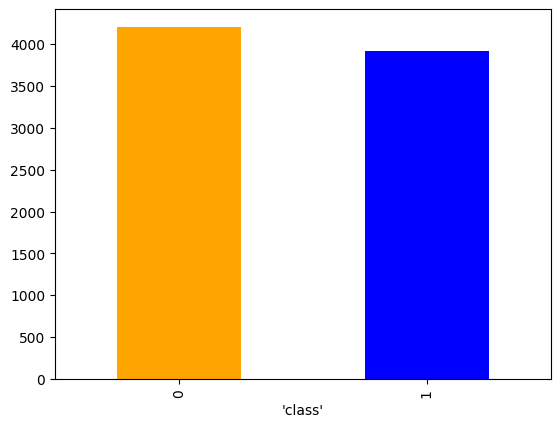

In [27]:
df["'class'"].value_counts().plot(kind='bar',color=['orange','blue'])

From the above plot we can see that mushroom are edible is higher than poisonous

* 0 edible
* 1 poisonous



<Axes: xlabel="'class'">

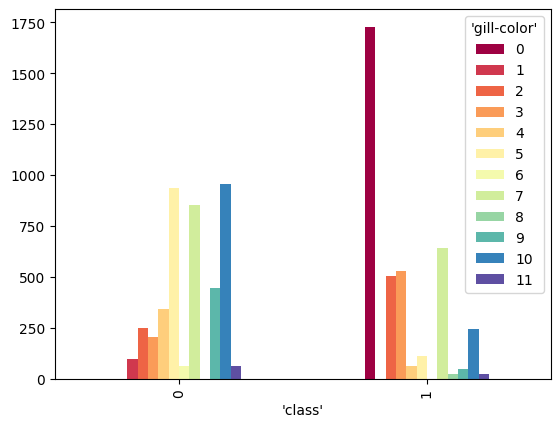

In [28]:
pd.crosstab(df["'class'"],df["'gill-color'"]).plot(kind='bar',colormap='Spectral')

Gill color Yellow higher than other colour , it shows that its poisonous



<Axes: xlabel="'class'">

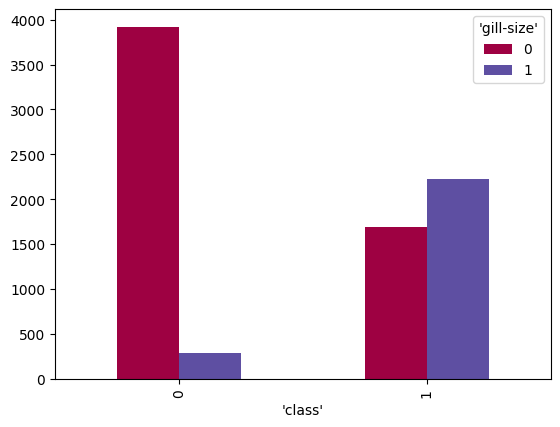

In [29]:
pd.crosstab(df["'class'"],df["'gill-size'"]).plot(kind='bar',colormap='Spectral')

<Axes: xlabel="'class'">

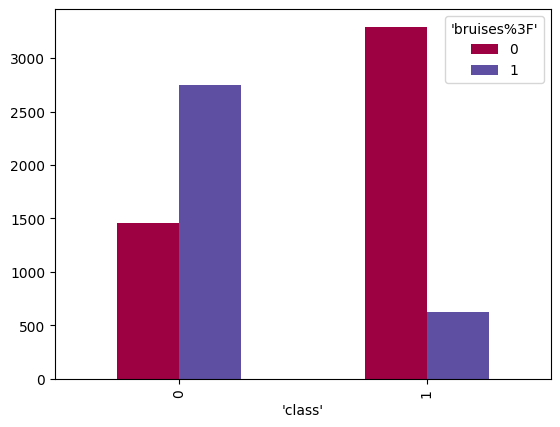

In [30]:
pd.crosstab(df["'class'"],df["'bruises%3F'"]).plot(kind='bar',colormap='Spectral')

<Axes: xlabel="'class'">

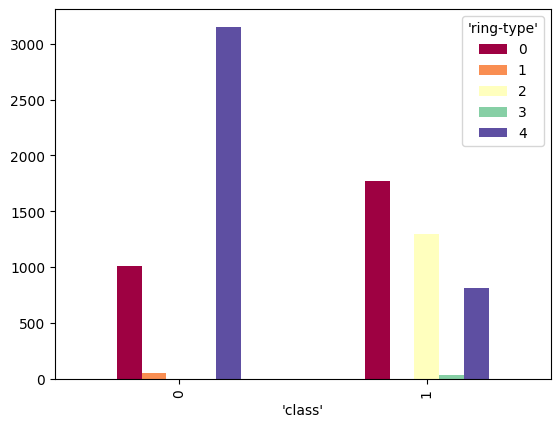

In [31]:
pd.crosstab(df["'class'"],df["'ring-type'"]).plot(kind='bar',colormap='Spectral')

<Axes: ylabel='count'>

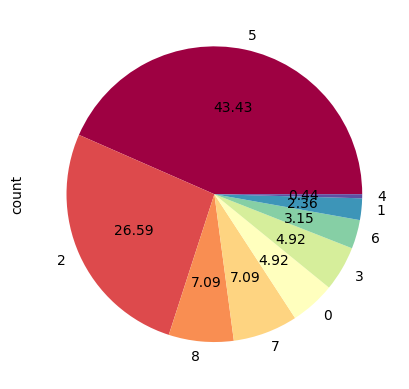

In [32]:
df["'odor'"].value_counts().plot(kind='pie',autopct='%.2f',
colormap='Spectral')


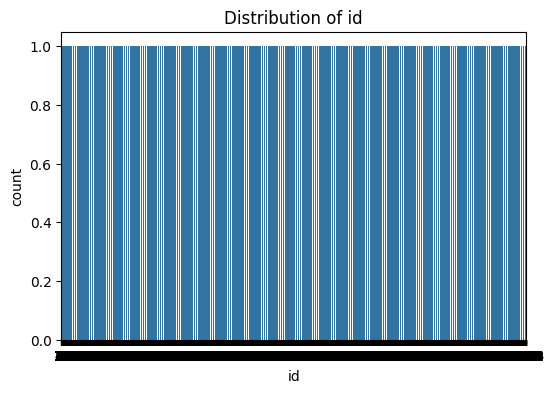

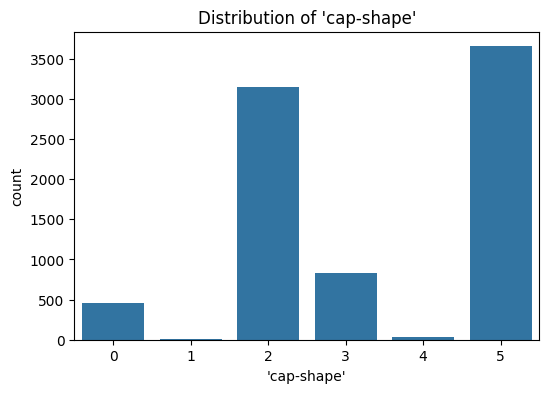

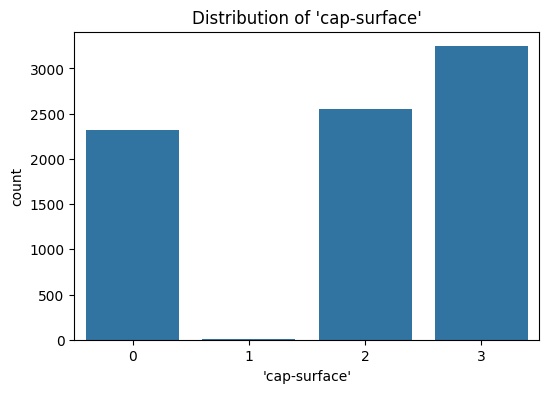

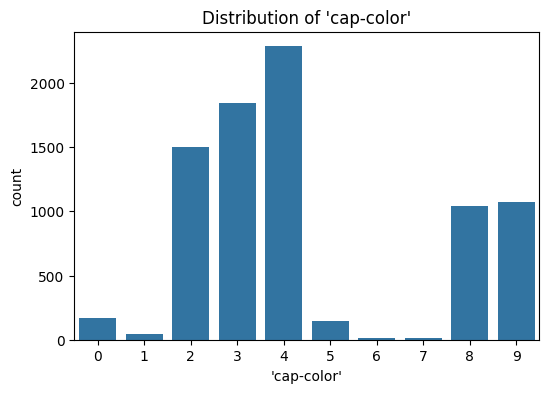

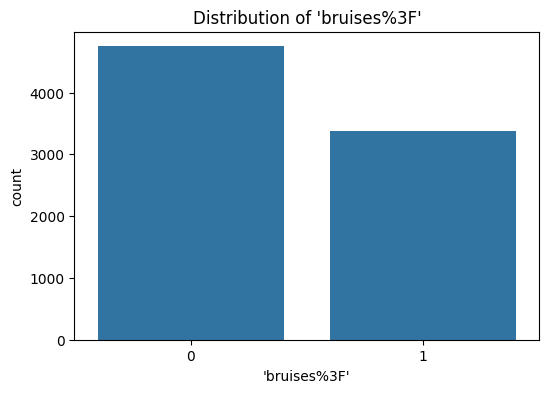

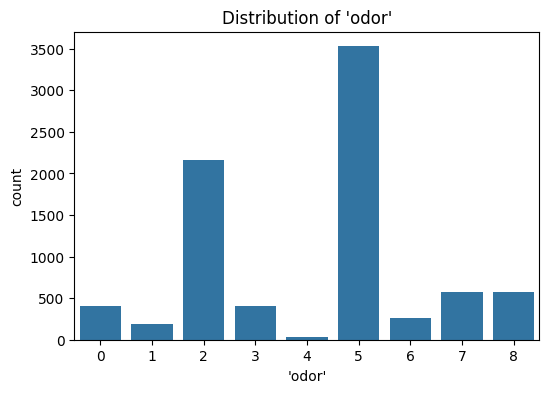

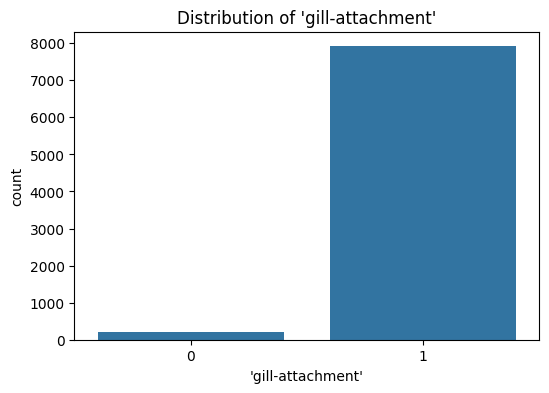

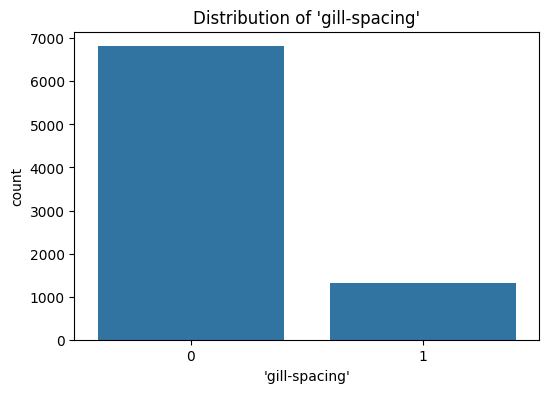

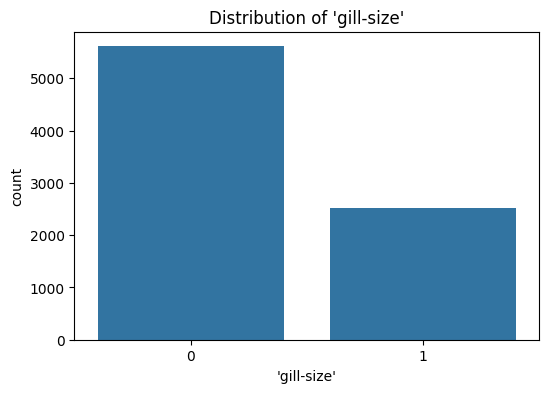

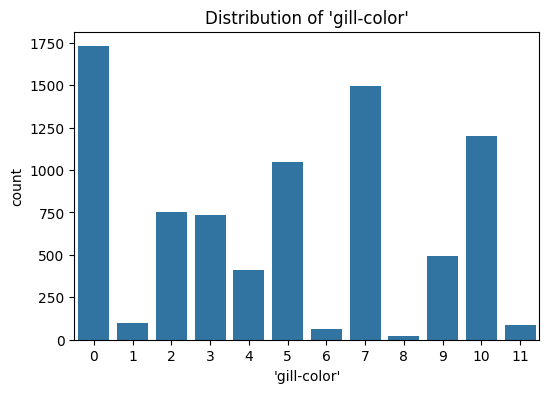

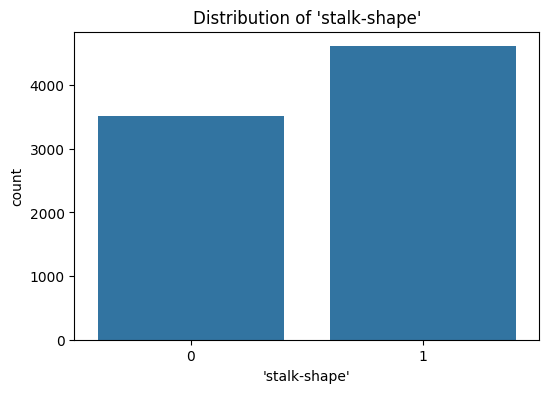

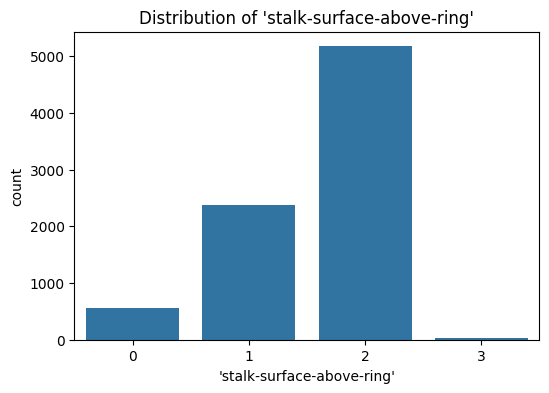

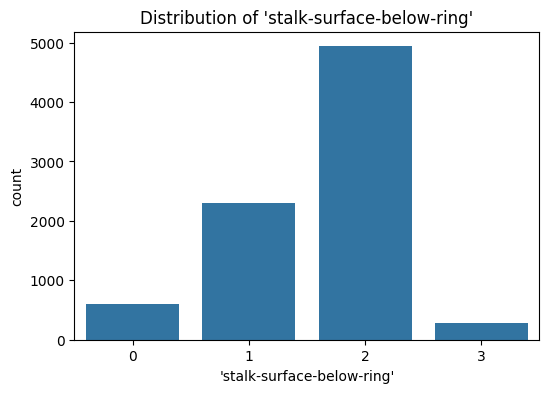

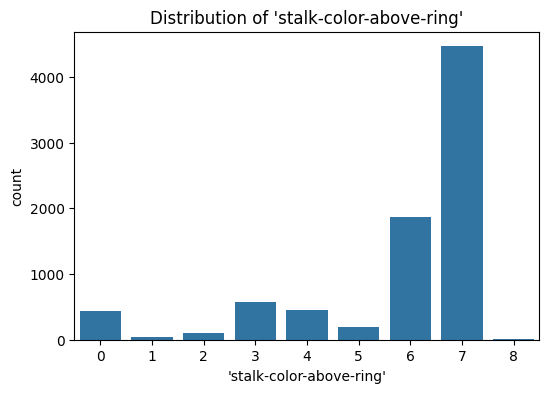

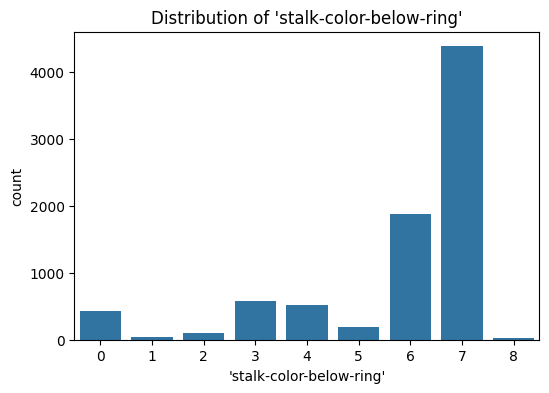

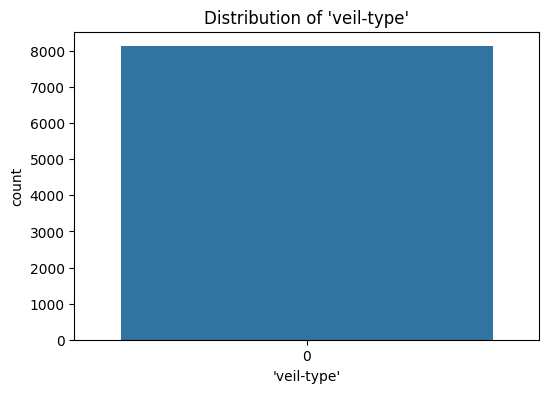

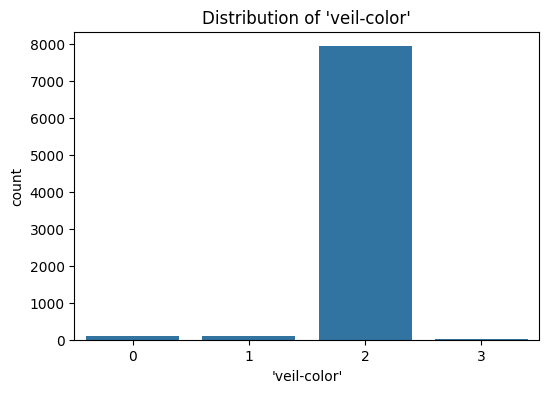

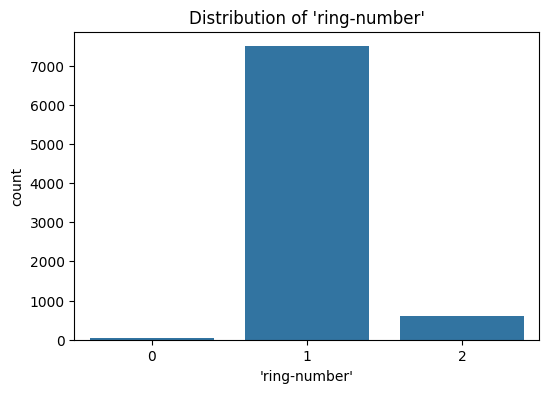

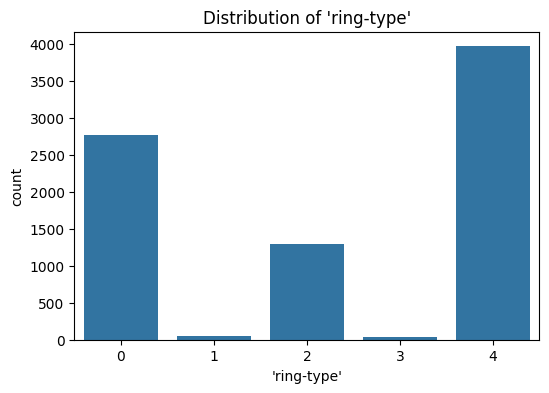

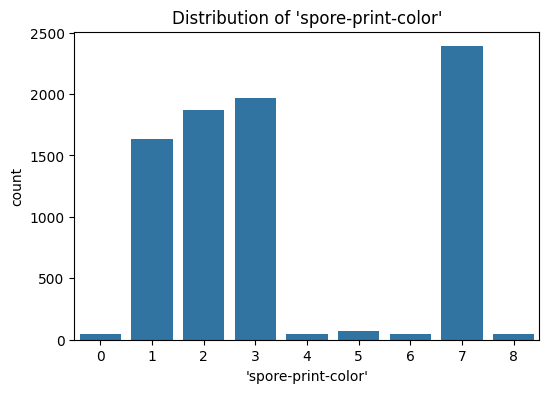

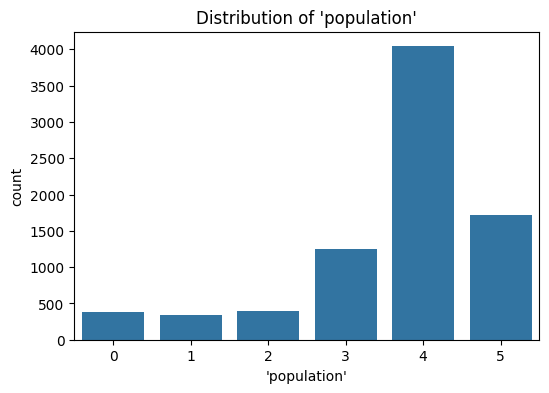

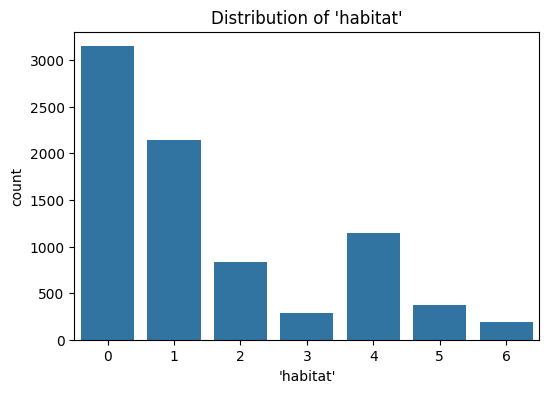

In [33]:
# Distribution of Features
for column in df.columns:
    if column !="'class'":
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.show()

### Train test Split


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 6 different machine learning models:
> 1. Logistic Regression
> 2. K-Nearest Neighbours Classifier
> 3. Support Vector machine
> 4. Decision Tree Classifier
> 5. Random Forest Classifier
> 6. XGBoost Classifier


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [35]:
from sklearn.model_selection import train_test_split

X=df.drop(["'class'"],axis=1)
y=df["'class'"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.885861     0.926763  0.904326     0.906312      0.905535
recall        0.936293     0.869835  0.904326     0.903064      0.904326
f1-score      0.910379     0.897397  0.904326     0.903888      0.904135
support    2951.000000  2735.000000  0.904326  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2763  188]
 [ 356 2379]]

Test Result:
Accuracy Score: 90.32%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.875644     0.937905  0.903199     0.906775      0.905804
recall        0.946698     0.856901  0.903199     0.901800      0.903199
f1-score      0.909786     0.895575  0.903199     0.902681      0.902902
support    1257.000000  1181.000

In [37]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.432642,90.319934


In [38]:
from sklearn import metrics

lr_clf_pred = lr_clf.predict(X_test)

print ('The accuracy of logistic regression is : ', (metrics.accuracy_score(y_test, lr_clf_pred))*100)

The accuracy of logistic regression is :  90.31993437243642


### 2. K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.49%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.915460     0.914244  0.914879     0.914852      0.914875
recall        0.921044     0.908227  0.914879     0.914635      0.914879
f1-score      0.918243     0.911225  0.914879     0.914734      0.914868
support    2951.000000  2735.000000  0.914879  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2718  233]
 [ 251 2484]]

Test Result:
Accuracy Score: 88.56%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.872713     0.900533  0.885562     0.886623      0.886190
recall        0.910899     0.858594  0.885562     0.884747      0.885562
f1-score      0.891397     0.879064  0.885562     0.885231      0.885423
support    1257.000000  1181.000

In [40]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
#df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.432642,90.319934
1,K-nearest neighbors,91.487865,88.556194


In [41]:
knn_clf_pred = knn_clf.predict(X_test)

print ('The accuracy of KNN is : ', (metrics.accuracy_score(y_test, knn_clf_pred))*100)

The accuracy of KNN is :  88.55619360131254


### 3. Support Vector machine

In [42]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2951.0  2735.0       1.0     5686.0        5686.0
_______________________________________________
Confusion Matrix: 
 [[2951    0]
 [   0 2735]]

Test Result:
Accuracy Score: 75.06%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.674556     0.994819  0.750615     0.834687      0.829696
recall        0.997613     0.487722  0.750615     0.742668      0.750615
f1-score      0.804878     0.654545  0.750615     0.729712      0.732055
support    1257.000000  1181.000000  0.750615  2438.000000   2438.000000
__________________

In [43]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.432642,90.319934
1,K-nearest neighbors,91.487865,88.556194
2,Support Vector Machine,100.000000,75.061526


### 4. Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2951.0  2735.0       1.0     5686.0        5686.0
_______________________________________________
Confusion Matrix: 
 [[2951    0]
 [   0 2735]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1257.0  1181.0       1.0     2438.0        2438.0
_______________________________________________
Confusion Matrix: 
 [[1257   

In [45]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.432642,90.319934
1,K-nearest neighbors,91.487865,88.556194
2,Support Vector Machine,100.000000,75.061526
3,Decision Tree Classifier,100.000000,100.000000


### 5. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2951.0  2735.0       1.0     5686.0        5686.0
_______________________________________________
Confusion Matrix: 
 [[2951    0]
 [   0 2735]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1257.0  1181.0       1.0     2438.0        2438.0
_______________________________________________
Confusion Matrix: 
 [[1257   

In [47]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.432642,90.319934
1,K-nearest neighbors,91.487865,88.556194
2,Support Vector Machine,100.000000,75.061526
3,Decision Tree Classifier,100.000000,100.000000
4,Random Forest Classifier,100.000000,100.000000


### 6. XGBoost Classifer


In [48]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2951.0  2735.0       1.0     5686.0        5686.0
_______________________________________________
Confusion Matrix: 
 [[2951    0]
 [   0 2735]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1257.0  1181.0       1.0     2438.0        2438.0
_______________________________________________
Confusion Matrix: 
 [[1257   

In [49]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.432642,90.319934
1,K-nearest neighbors,91.487865,88.556194
2,Support Vector Machine,100.000000,75.061526
3,Decision Tree Classifier,100.000000,100.000000
4,Random Forest Classifier,100.000000,100.000000
5,XGBoost Classifier,100.000000,100.000000


                       Feature  Importance
5                       'odor'    0.151731
0                           id    0.141253
8                  'gill-size'    0.108623
9                 'gill-color'    0.097086
19         'spore-print-color'    0.084631
18                 'ring-type'    0.066190
20                'population'    0.052235
4                 'bruises%3F'    0.041603
11  'stalk-surface-above-ring'    0.039411
12  'stalk-surface-below-ring'    0.038657
7               'gill-spacing'    0.036468
21                   'habitat'    0.029595
10               'stalk-shape'    0.024193
17               'ring-number'    0.020101
13    'stalk-color-above-ring'    0.016990
14    'stalk-color-below-ring'    0.015350
3                  'cap-color'    0.011995
2                'cap-surface'    0.009517
16                'veil-color'    0.005733
1                  'cap-shape'    0.005087
6            'gill-attachment'    0.003552
15                 'veil-type'    0.000000


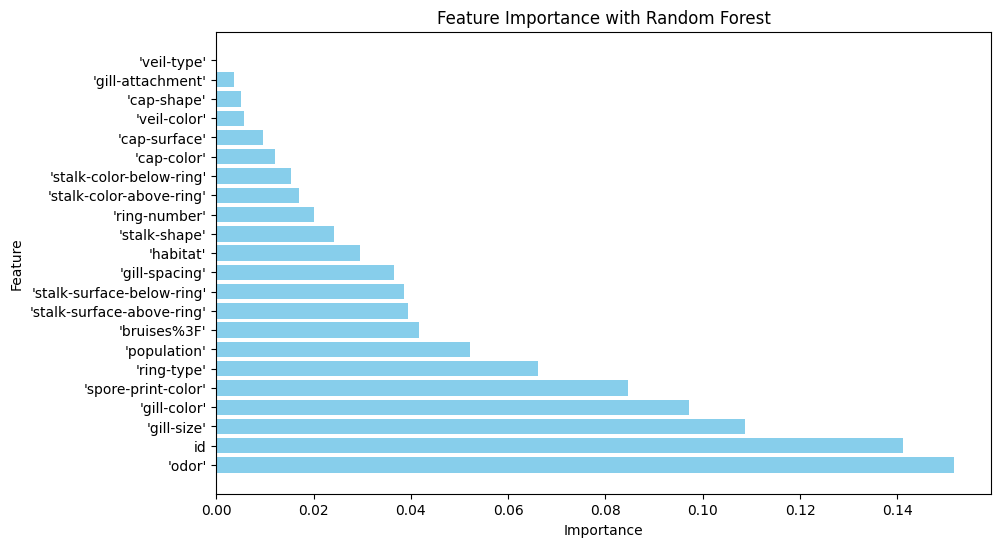

In [50]:
# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance DataFrame
print(feature_importance_df)

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Random Forest')
plt.show()


## Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

RF_Mush = RandomForestClassifier()

mean_accuracy = cross_val_score(RF_Mush, X, y, cv=5, scoring='accuracy', verbose=2) #verbose is 0,1,2(2 is to see the process)

print('The total number of accuracy are: ', mean_accuracy)
print('')
print('The average of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
The total number of accuracy are:  [0.84246154 1.         0.99569231 1.         0.5       ]

The average of all is:  86.76307692307692


In [52]:
from sklearn.model_selection import cross_val_score

DT_Mush = DecisionTreeClassifier()

mean_accuracy = cross_val_score(DT_Mush, X, y, cv=5, scoring='accuracy', verbose=2) #verbose is 0,1,2(2 is to see the process)

print('The total number of accuracy are: ', mean_accuracy)
print('')
print('The average of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
The total number of accuracy are:  [0.51753846 0.99261538 1.         0.99876923 0.48214286]

The average of all is:  79.82131868131867


In [53]:
from sklearn.model_selection import cross_val_score

XGB_Mush = XGBClassifier(use_label_encoder=False)

mean_accuracy = cross_val_score(XGB_Mush, X, y, cv=5, scoring='accuracy', verbose=2) #verbose is 0,1,2(2 is to see the process)

print('The total number of accuracy are: ', mean_accuracy)
print('')
print('The average of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
The total number of accuracy are:  [0.54092308 1.         0.97046154 1.         0.48214286]

The average of all is:  79.87054945054946


## Models Hyperparameter Tuning

### 1. Logistic Regression Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10000.0, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 96.83%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.970458     0.966071  0.968343     0.968265      0.968348
recall        0.968485     0.968190  0.968343     0.968338      0.968343
f1-score      0.969471     0.967129  0.968343     0.968300      0.968345
support    2951.000000  2735.000000  0.968343  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2858   93]
 [  87 2648]]

Test Result:
Accuracy Score: 96.88%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.969023     0.968617  0.968827     0.968820      0.968827
recall        0.970565     0.966977  0.968827     0.968771   

In [55]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.83433,96.882691


### 2. K-Nearest Neighbors Hyperparameter Tuning

In [56]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


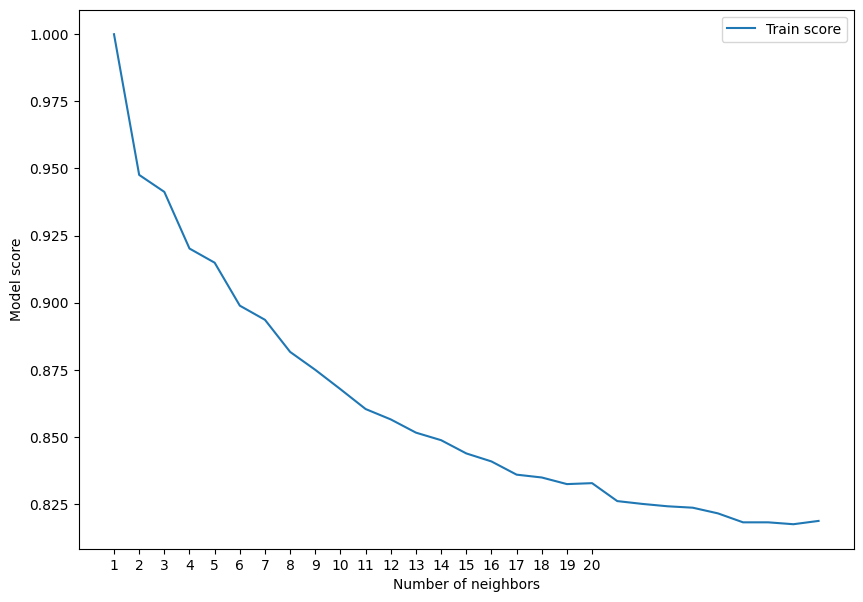

In [57]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [58]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.81%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.841468     0.795415   0.81815     0.818441      0.819316
recall        0.800407     0.837294   0.81815     0.818850      0.818150
f1-score      0.820424     0.815818   0.81815     0.818121      0.818208
support    2951.000000  2735.000000   0.81815  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2362  589]
 [ 445 2290]]

Test Result:
Accuracy Score: 82.77%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.833998     0.821097  0.827728     0.827548      0.827749
recall        0.831344     0.823878  0.827728     0.827611      0.827728
f1-score      0.832669     0.822485  0.827728     0.827577      0.827736
support    1257.000000  1181.000

In [59]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
#tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.834330,96.882691
1,Tuned K-nearest neighbors,81.814984,82.772765


### 3. Support Vector Machine Hyperparameter Tuning

In [60]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
#tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.834330,96.882691
1,Tuned K-nearest neighbors,81.814984,82.772765
2,Tuned Support Vector Machine,100.000000,75.061526


In [61]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

## Deployment

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import gradio as gr

# Load the dataset (replace with your actual file path)
df = pd.read_csv('/content/csv_result-dataset_24_mushroom.csv')

# Replace '?' with NaN and drop the 'stalk-root' column
df.replace('?', np.nan, inplace=True)
df.drop("'stalk-root'", axis=1, inplace=True)
df.dropna(inplace=True)

# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Select the 5 best features
selected_features = ["'odor'", "'gill-size'", "'gill-color'", "'spore-print-color'", "'ring-type'"]
X = df[selected_features]
y = df["'class'"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9938461538461538

Confusion Matrix:
 [[843   0]
 [ 10 772]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [63]:
# Function to predict using the trained model
def predict_mushroom(odor, gill_size, gill_color, spore_print_color, ring_type):
  # Create a DataFrame with the input values
  input_data = pd.DataFrame({
      "'odor'": [odor],
      "'gill-size'": [gill_size],
      "'gill-color'": [gill_color],
      "'spore-print-color'": [spore_print_color],
      "'ring-type'": [ring_type]
  })
  # Make a prediction using the trained model
  prediction = rf_clf.predict(input_data)[0]
  # Return the prediction (0 for edible, 1 for poisonous)
  return "Edible" if prediction == 0 else "Poisonous"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_mushroom,
    inputs=[
        gr.Dropdown(choices=sorted(df["'odor'"].unique()), label='Odor'),
        gr.Dropdown(choices=sorted(df["'gill-size'"].unique()), label='Gill Size'),
        gr.Dropdown(choices=sorted(df["'gill-color'"].unique()), label='Gill Color'),
        gr.Dropdown(choices=sorted(df["'spore-print-color'"].unique()), label='Spore Print Color'),
        gr.Dropdown(choices=sorted(df["'ring-type'"].unique()), label='Ring Type')
    ],
    outputs="text",
    title="Mushroom Edibility Predictor",
    description="Predict if a mushroom is edible or poisonous based on its features."
)

# Launch the Gradio interface
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e37eda62dc0ddde18f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
